## On crée notre MainGrid.

In [21]:
from code_folder.MainGrid import MainGrid

main_grid = MainGrid()

Cette MainGrid est composée de 8 CEMS (Community Energy Management System).

In [22]:
cems = main_grid.schedule.agents[0]
cems

Et chaque CEMS est composé de 1000 HEMS (Home Energy Management System).

In [23]:
hems = cems.schedule.agents[0]
hems

Chaque HEMS possède un DemandAgent qui choisit un mode de consommation (vert, bas coût ou stable).

In [24]:
hems.a_demand.mode

'bas coût'

In [25]:
# Au niveau de la cems
cems.repart

{'vert': 322, 'stable': 310, 'bas coût': 368}

Cela permet de prédire la consommation de la cems. 
D'abord, en simulant une consommation passée.

In [26]:
from code_folder.data import get_consumption_yesterday
conso_hier = get_consumption_yesterday(cems.repart)
conso_hier

[402.8418484649545,
 353.23481906098715,
 358.5862621154002,
 355.5409906046648,
 353.73509652194326,
 360.09896143367996,
 400.2723984601825,
 404.2043998190468,
 426.5575107375956,
 419.29997671501167,
 419.9587929689674,
 415.8606742091322,
 420.10971964302837,
 425.5586621407352,
 425.56888456248447,
 393.3512701807072,
 391.6788875061559,
 404.9621676877837,
 394.42412640646194,
 411.84524487690817,
 423.0888895226348,
 419.5988793977334,
 406.7667583978083,
 401.1616644594666]

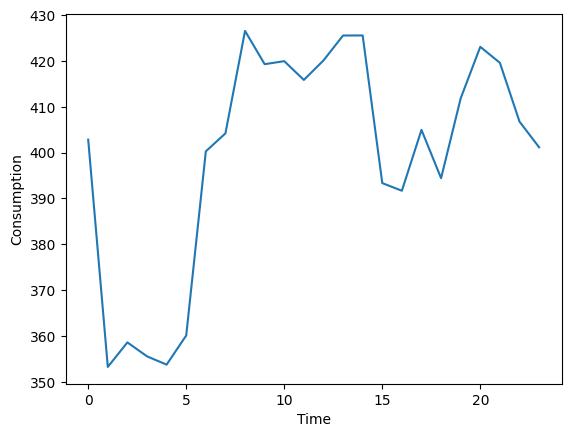

In [27]:
import matplotlib.pyplot as plt
plt.plot(conso_hier)
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()

Puis de prédire une consommation pour aujourd'hui en lissant la consommation d'hier. 

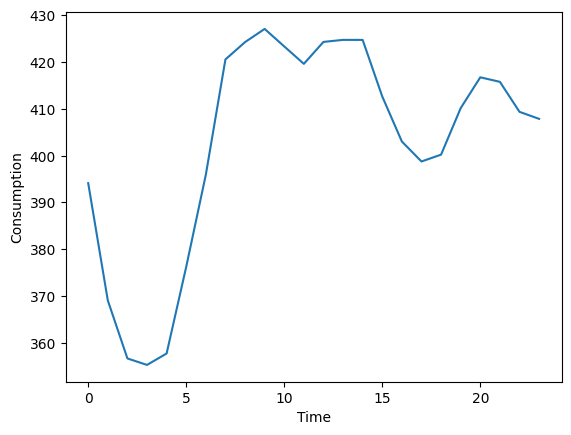

In [28]:
from code_folder.data import pred_consumption

pred = pred_consumption(cems.repart)
plt.plot(pred)
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()

## On a donc accès à la prédiction pour les 8 communautés cumulées.

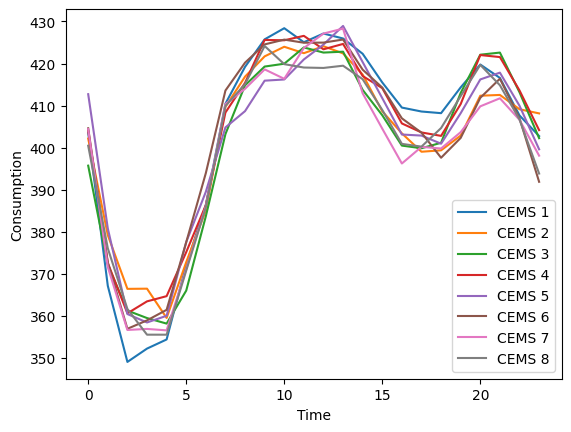

In [29]:
for i in range(8):
    plt.plot(main_grid.pred_consumption[i])
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.legend(['CEMS 1', 'CEMS 2', 'CEMS 3', 'CEMS 4', 'CEMS 5', 'CEMS 6', 'CEMS 7', 'CEMS 8'])
plt.show()

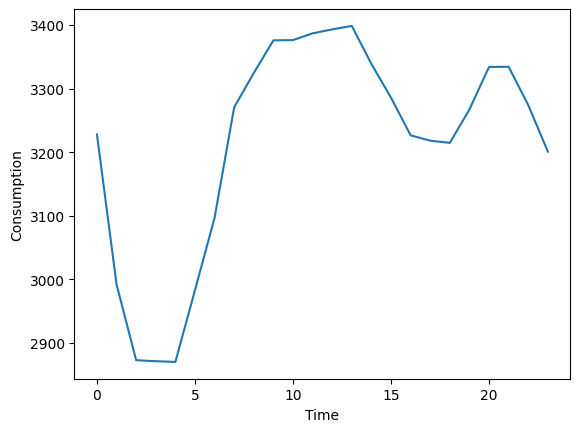

In [30]:
# on somme toutes les prédictions
sum_pred = [0 for i in range(24)]
for i in range(8):
    sum_pred = [sum_pred[j] + main_grid.pred_consumption[i][j] for j in range(24)]
plt.plot(sum_pred)
plt.ylabel('Consumption')
plt.xlabel('Time')
plt.show()

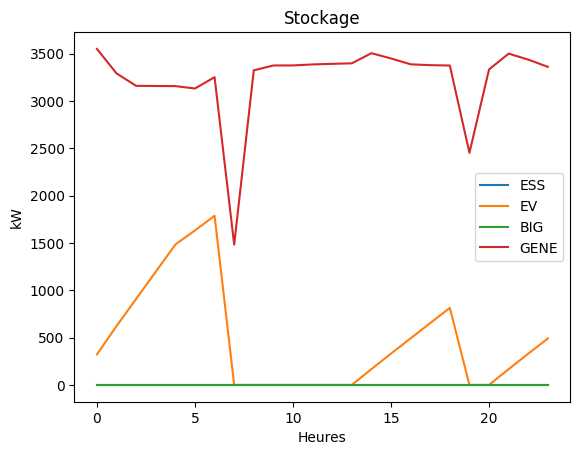

In [31]:
main_grid.step()
plt.plot([sum(val) for val in main_grid.ess[1:]])
plt.plot([sum(val) for val in main_grid.ev[1:]])
plt.plot([val for val in main_grid.l_big[1:]])
plt.plot([sum(val) for val in main_grid.gene[1:]])
plt.ylabel('kW')
plt.xlabel('Heures')
plt.title('Stockage')
plt.legend(['ESS', 'EV', 'BIG', 'GENE'])

## On peut accéder au prix de l'électricité.

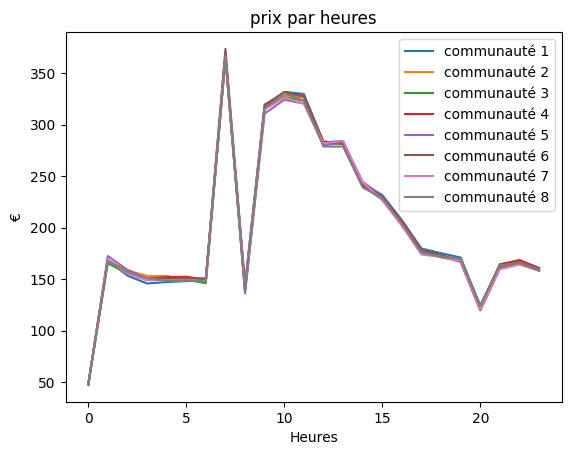

In [32]:
for i in range(8):
    prix = []
    for j in range(24):
        prix.append(main_grid.schedule.agents[i].paid_electricity[j]*main_grid.gene[j][i])
    plt.plot((prix))

plt.ylabel('€')
plt.xlabel('Heures')
plt.title('prix par heures')
plt.legend(['communauté 1', 'communauté 2', 'communauté 3', 'communauté 4', 'communauté 5', 'communauté 6', 'communauté 7', 'communauté 8'])
plt.show()